In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from google.colab import files

In [3]:
uploaded = files.upload()


Saving PCOS_data_without_infertility copy.xlsx to PCOS_data_without_infertility copy.xlsx


In [4]:
# Get the uploaded filename
file_name = list(uploaded.keys())[0]

# Load dataset
# Use file_name instead of file_path
df = pd.read_excel(file_name, sheet_name="Full_new")

# Display dataset info
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           

In [5]:
df = df.drop(columns=["Sl. No", "Patient File No.", "Unnamed: 44"], errors='ignore')


In [6]:
# Handle missing values
for column in df.select_dtypes(include=np.number).columns:
    imputer = SimpleImputer(strategy='median')
    df[column] = imputer.fit_transform(df[[column]])

# For categorical columns, consider using 'most_frequent'
for column in df.select_dtypes(exclude=np.number).columns:
    imputer = SimpleImputer(strategy='most_frequent')  # Or another appropriate strategy
    # The line below is modified to fix the error
    df[column] = imputer.fit_transform(df[[column]]).ravel() # Convert to 1D using ravel()

In [7]:
if "BMI" not in df.columns or df["BMI"].isnull().all():
    df["BMI"] = df["Weight (Kg)"] / ((df["Height(Cm)"] / 100) ** 2)

In [8]:
#new
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns if any
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    # Convert the column to string type before applying LabelEncoder
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

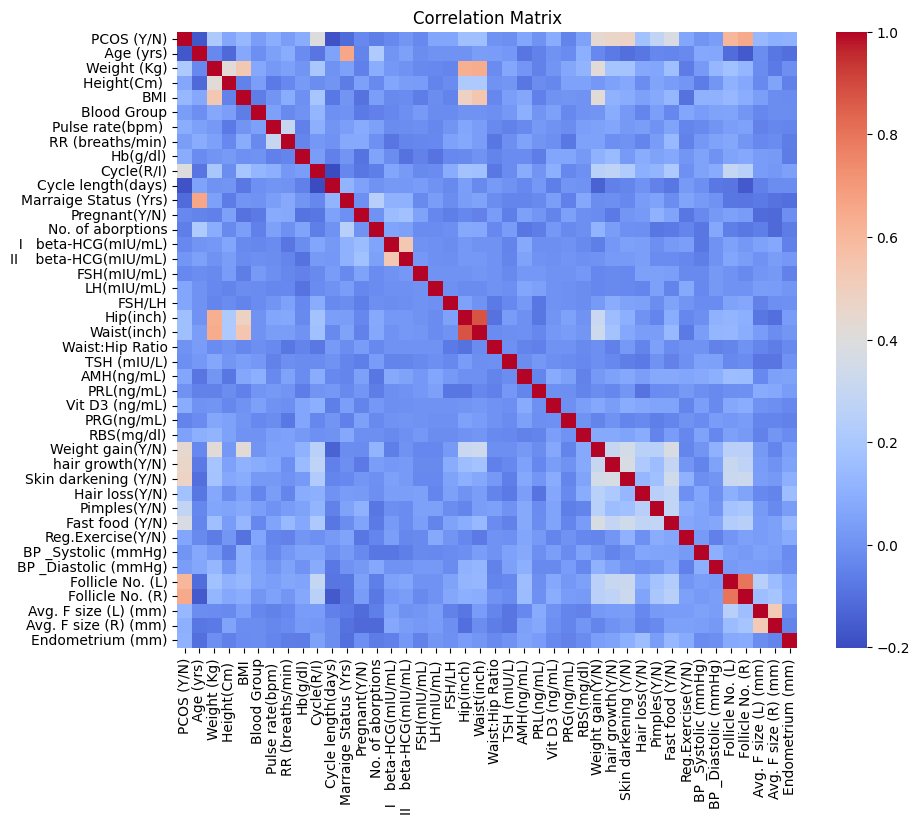

In [9]:
correlation_matrix = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [10]:
X = df.drop(columns=["PCOS (Y/N)"])
y = df["PCOS (Y/N)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
tree = RandomForestClassifier(n_estimators=100, random_state=42)
tree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
y_pred = tree.predict(X_test)

In [14]:
#reportsss
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#confusion matrix

# Predicted Positive	Predicted Negative
# Actual Positive	True Positive (TP)	False Negative (FN)
# Actual Negative	False Positive (FP)	True Negative (TN)

# Correctly predicted PCOS (True Positive)
# Correctly predicted no PCOS (True Negative)
# Incorrectly predicted PCOS when the patient didn't have it (False Positive)
# Incorrectly predicted no PCOS when the patient did have it (False Negative)


Accuracy: 0.8715596330275229
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.96      0.91        77
         1.0       0.88      0.66      0.75        32

    accuracy                           0.87       109
   macro avg       0.87      0.81      0.83       109
weighted avg       0.87      0.87      0.87       109

Confusion Matrix:
 [[74  3]
 [11 21]]
